In [6]:
import torch
import ot
import matplotlib.pyplot as plt

In [186]:
def wasserstein_distance(a, b, wa, wb):

    W_dist = ot.wasserstein_1d(a, b, wa, wb, p = 1)

    return W_dist

In [185]:
def wasserstein_distance2(a, b, wa, wb):

    W_dist = ot.emd2_1d(a, b, wa, wb, metric = 'euclidean')

    return W_dist

In [196]:
def wasserstein_dist_old(a, b, x):
    
    M = ot.dist(x.reshape(x.size(0),1), x.reshape(x.size(0),1), 'euclidean') #euclidean->W_1 é la distanza euclidea ed sqeuclidean é la radice quandrata->W_2
    T = ot.emd(a, b, M)

    # W = torch.sqrt(torch.sum(T*M))
    W = torch.sum(T*M)

    return W

tensor(39.9996, dtype=torch.float64)
tensor(39.9996, dtype=torch.float64)
tensor(39)


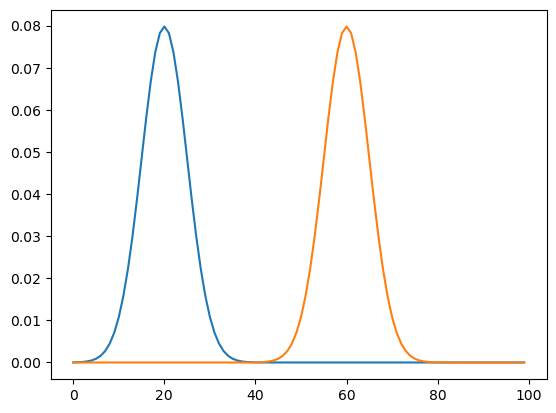

In [201]:
n = 100

x = torch.arange(n)

a =  torch.tensor(ot.datasets.make_1D_gauss(n, m=20, s=5))
b =  torch.tensor(ot.datasets.make_1D_gauss(n, m=60, s=5)) 

plt.plot(x, a)
plt.plot(x, b)

print(wasserstein_dist_old(a, b, x))
print(wasserstein_distance(x, x, a, b))
print(wasserstein_distance2(x, x, a, b))